In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization


In [2]:
data = 'data.csv'

Custom_Header = ["N","Pif","Temp","Humid","Vent","Golf"]

df = pd.read_csv(data, names=Custom_Header, header=None)


In [3]:
df.shape

(14, 6)

In [4]:
df.head()


,N,Pif,Temp,Humid,Vent,Golf
0,1,soleil,chaud,haute,faux,NePasJouer
1,2,soleil,chaud,haute,vrai,NePasJouer
2,3,couvert,chaud,haute,faux,Jouer
3,4,pluie,bon,haute,faux,Jouer
4,5,pluie,frais,normale,faux,Jouer


In [5]:
df['Temp'].value_counts()


bon      6
chaud    4
frais    4
Name: Temp, dtype: int64

In [6]:
df.isnull().sum()


N        0
Pif      0
Temp     0
Humid    0
Vent     0
Golf     0
dtype: int64

In [7]:
X = df.drop(['Temp'], axis=1)
print(X)
y = df['Temp']


     N      Pif    Humid  Vent        Golf
0    1   soleil    haute  faux  NePasJouer
1    2   soleil    haute  vrai  NePasJouer
2    3  couvert    haute  faux       Jouer
3    4    pluie    haute  faux       Jouer
4    5    pluie  normale  faux       Jouer
5    6    pluie  normale  vrai  NePasJouer
6    7  couvert  normale  vrai       Jouer
7    8   soleil    haute  faux  NePasJouer
8    9   soleil  normale  faux       Jouer
9   10    pluie  normale  faux       Jouer
10  11    solei  normale  vrai       Jouer
11  12  couvert    haute  vrai       Jouer
12  13  couvert  normale  faux       Jouer
13  14    pluie    haute  vrai  NePasJouer


In [8]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [9]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((9, 5), (5, 5))

In [10]:
# check data types in X_train

X_train.dtypes

N         int64
Pif      object
Humid    object
Vent     object
Golf     object
dtype: object

In [11]:
X_train.head()


,N,Pif,Humid,Vent,Golf
8,9,soleil,normale,faux,Jouer
2,3,couvert,haute,faux,Jouer
1,2,soleil,haute,vrai,NePasJouer
13,14,pluie,haute,vrai,NePasJouer
4,5,pluie,normale,faux,Jouer


In [12]:
# import category encoders

import category_encoders as ce

In [13]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(df.columns)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [14]:
X_train.head()


,N,Pif,Humid,Vent,Golf
8,9,1,1,1,1
2,3,2,2,1,1
1,2,1,2,2,2
13,14,3,2,2,2
4,5,3,1,1,1


In [15]:
X_test.head()


,N,Pif,Humid,Vent,Golf
9,10,3,1,1,1
11,12,2,2,2,1
0,1,1,2,1,2
12,13,2,1,1,1
5,6,3,1,2,2


In [16]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)


In [17]:
# fit the model

rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [18]:

# Predict the Test set results

y_pred = rfc.predict(X_test)


In [19]:

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6000


In [20]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


In [21]:
# fit the model to the training set

rfc_100.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [22]:

# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)


In [23]:

# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.6000


In [25]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [26]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

N        0.346426
Humid    0.252890
Pif      0.248383
Golf     0.088210
Vent     0.064092
dtype: float64

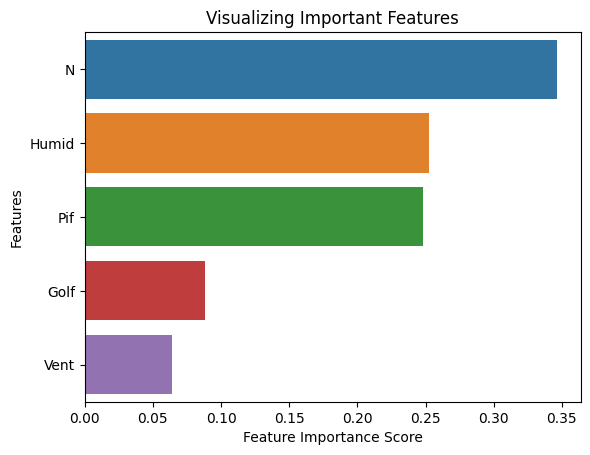

In [27]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()